# Male & Female Classification Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

inception_weights_path = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'


In [4]:
import kagglehub

#import training data
path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")

print("Path to dataset files:", path)

#import training and validation data
!git clone https://github.com/laxmimerit/male-female-face-dataset.git

Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1
fatal: destination path 'male-female-face-dataset' already exists and is not an empty directory.


In [ ]:
!cd /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset | ls -la


In [5]:
epochs = 50
lr = 1e-3
batch_size = 128
data = []
labels = []
size = 224 #image dimension

Image Processing

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   rotation_range = 20)


In [7]:
test_gen = ImageDataGenerator(rescale = 1/255)

In [8]:
target_size = (size,size)

In [9]:
train_generator = train_datagen.flow_from_directory(
    directory='/content/male-female-face-dataset/Training',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 47009 images belonging to 2 classes.


In [10]:
validation_generator = test_gen.flow_from_directory(
    directory='/content/male-female-face-dataset/Validation',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 11649 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'female': 0, 'male': 1}

ML Model Training

In [13]:
model = Sequential()
model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,118,817 (107.26 MB)

 Trainable params: 6,305,793 (24.05 MB)

 Non-trainable params: 21,813,024 (83.21 MB)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
len(train_generator.filenames)

47009

In [87]:
model.fit(train_generator,
          steps_per_epoch=len(train_generator.filenames),
          epochs=2,
          validation_data=validation_generator,
          validation_steps=len(validation_generator.filenames))

Epoch 1/2
47009/47009 ━━━━━━━━━━━━━━━━━━━━ 602s 13ms/step - accuracy: 0.8818 - loss: 0.2873 - val_accuracy: 0.9250 - val_loss: 0.1953
Epoch 2/2
47009/47009 ━━━━━━━━━━━━━━━━━━━━ 599s 12ms/step - accuracy: 0.8832 - loss: 0.2802 - val_accuracy: 0.9303 - val_loss: 0.1779


Model Testing

In [45]:
img_path = '/content/0 (991).jpg'

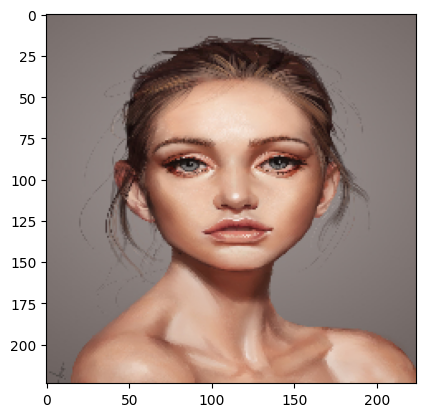

In [46]:
img = load_img(img_path, target_size=(size,size,3))
plt.imshow(img)

In [47]:
img = img_to_array(img)
img = img/255
img = img.reshape(1,size,size,3)

img.shape

(1, 224, 224, 3)

In [48]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.00078711]], dtype=float32)

In [76]:
def get_classes(data):
  prob = model.predict(data)[0][0]
  if prob > 0.5:
    return 'Male',prob
  else:
    return 'Female',1-prob

In [78]:
get_classes(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


('Female', 0.999212886323221)

Real-Time Image Recognition

In [79]:
img_path = '/content/photo.jpg'

In [80]:
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [81]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


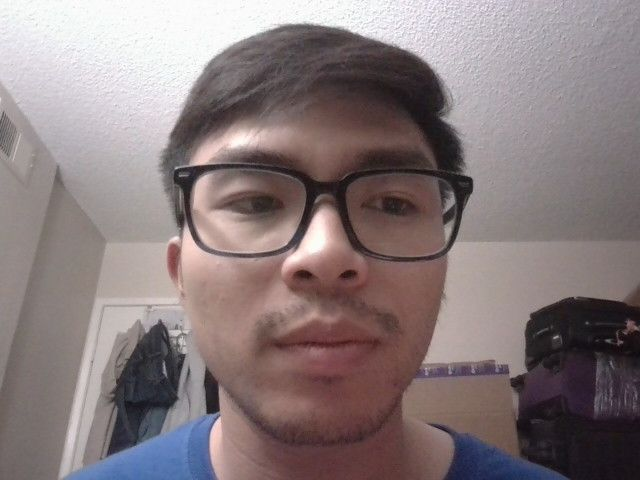

In [82]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [84]:
def get_pred(image_path):
  img = load_img(image_path, target_size=(size,size,3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255
  img = img.reshape(1,size,size,3)

  pred,prob = get_classes(img)
  return pred,prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


('Male', 0.88653445)

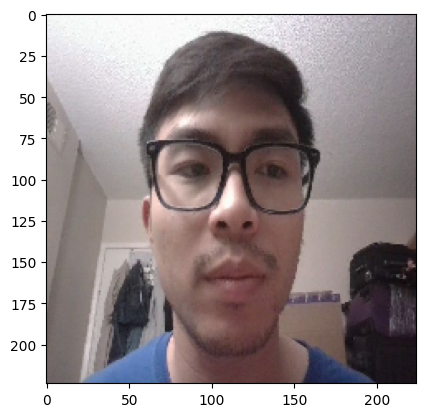

In [85]:
get_pred('/content/photo.jpg')